In [220]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from scipy.fftpack import fftshift
from matplotlib import style
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings('always')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import KBinsDiscretizer
plt.style.use("bmh")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.decomposition import PCA

from scipy.stats import spearmanr, kendalltau
import missingno as msno
import os
import joblib
import tarfile
import urllib


# classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,StackingClassifier
# HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
# #regression
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

# #evaluation metrics
# from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, plot_confusion_matrix, classification_report  # for classification

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from tpot import TPOTClassifier

from sklearn.metrics import classification_report, confusion_matrix  

In [6]:
train = pd.read_csv('train.csv')
df=train.copy()

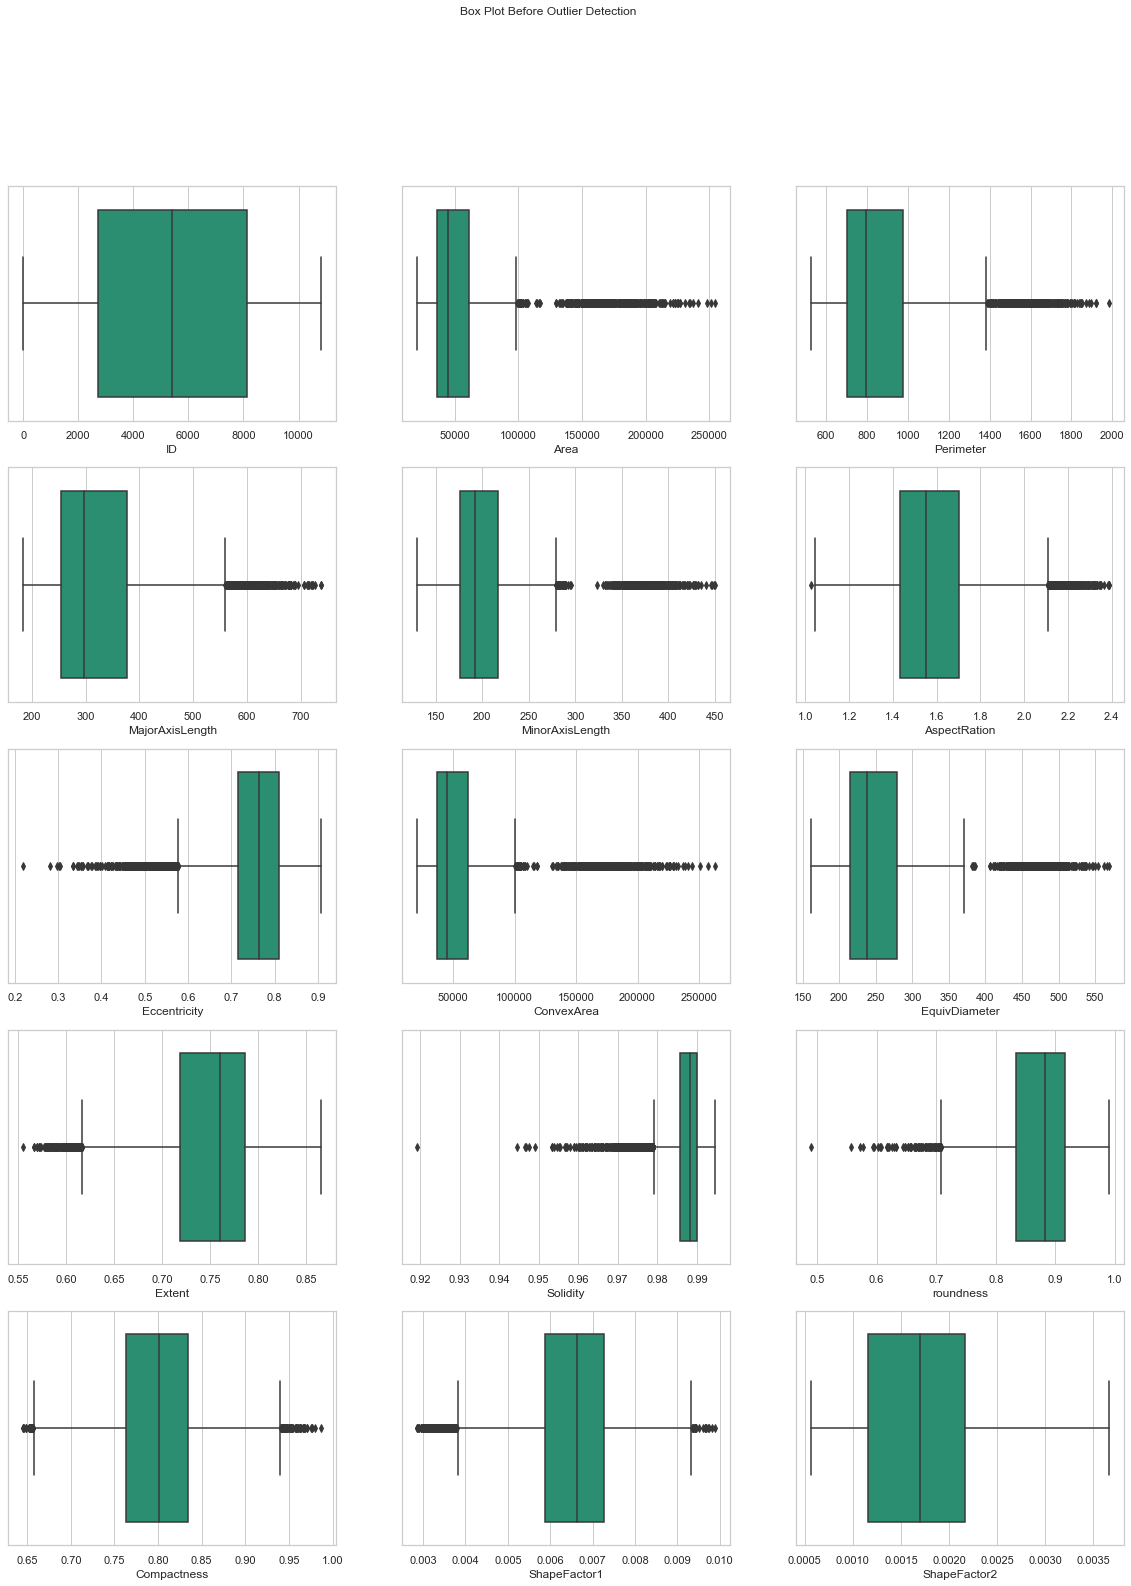

In [4]:
fig, axes = plt.subplots(5,3, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,3):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k], palette='Dark2')
        k=k+1

In [5]:
numerical_only = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

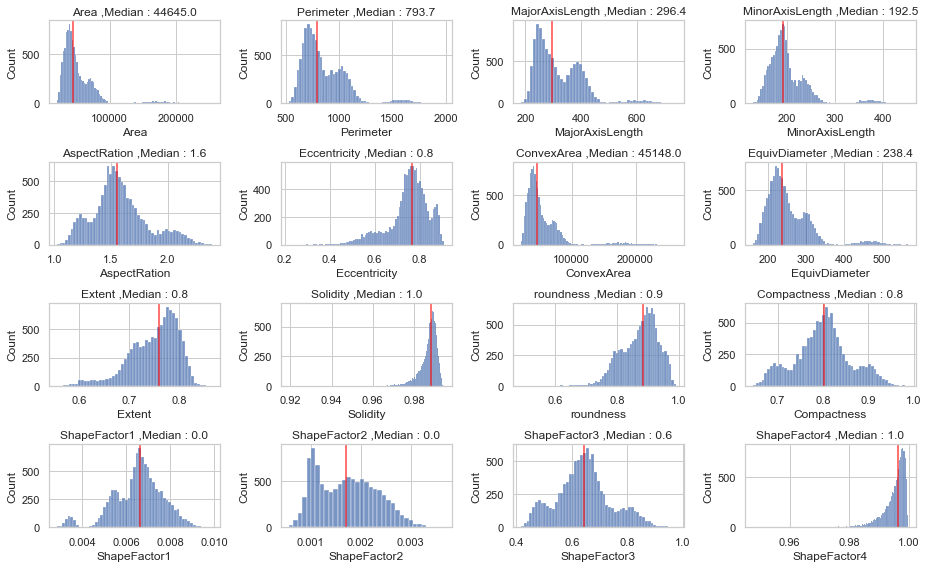

In [6]:
fig,axes = plt.subplots(4,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.histplot(df[numerical_only[i]],ax=axe)
    median = df[numerical_only[i]].median()
    axe.set_title(numerical_only[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red',lw=2, alpha = 0.55)
plt.tight_layout()
plt.show()

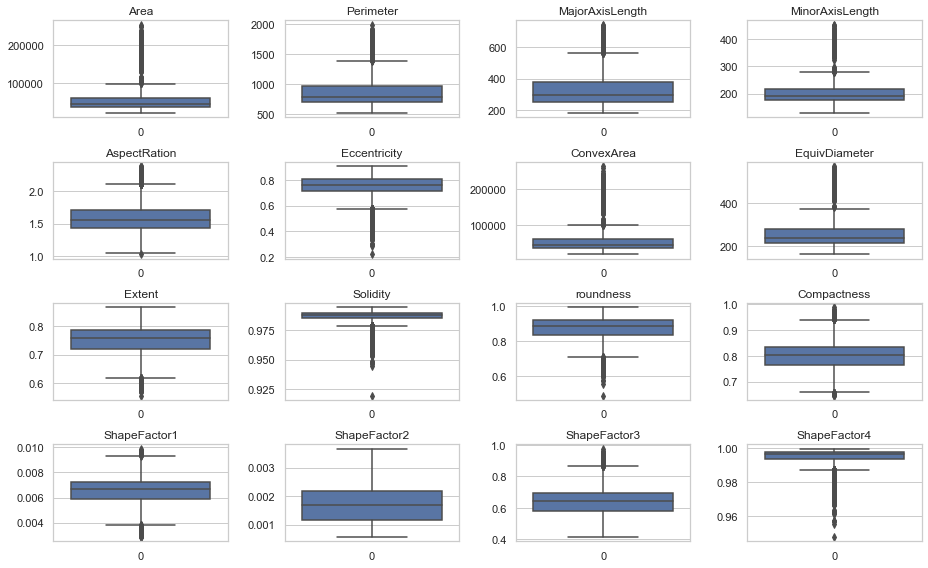

In [7]:
fig,axes = plt.subplots(4,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.boxplot(data=df[numerical_only[i]],ax=axe)
    axe.set_title(numerical_only[i])
    
plt.tight_layout()
plt.show()

In [10]:
# for i in numerical_only:
    
#     plt.scatter(x = 'y', y = i, data = df)
#     # Create title, xlabel and ylabel
#     plt.title(i)
#     plt.xlabel('y')
#     plt.ylabel(i)
#     # Show plot
#     plt.show()


In [ ]:
# df["Humidity_ap"] = pd.Series(np.where(df.Humidity < 58, "Hum_increase", "Hum_decrease"))

In [223]:
df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y', 'ShapeFactor5',
       'Second_Eccentricity', 'Third_Eccentricity', 'Angular_Eccentricity',
       'Sphericity', 'Curvature_R1', 'Curvature_R2', 'Curvature_Degree_1',
       'Curvature_Degree_2', '1st_flat', '2nd_flat', '3rd_flat', 'elongation',
       'Solidity_2', 'factors', 'Ar', 'Convex_per', 'Convexity', 'f_length',
       'f_width', 'Curl'],
      dtype='object')

In [ ]:
# # plt.figure(figsize=(10,10))
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['MajorAxisLength']<700)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['MajorAxisLength'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['MajorAxisLength'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# # df=df2;
# # df=df.reset_index(drop=True)

Before Shape: (10834, 39)
After Shape: (10821, 39)


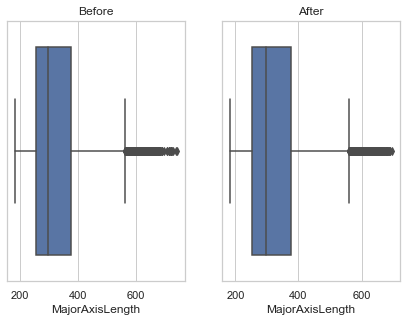

In [246]:
# # plt.figure(figsize=(10,10))
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['MajorAxisLength']<700)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['MajorAxisLength'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['MajorAxisLength'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# # df=df2;
# # df=df.reset_index(drop=True)

Before Shape: (10834, 39)
After Shape: (0, 39)


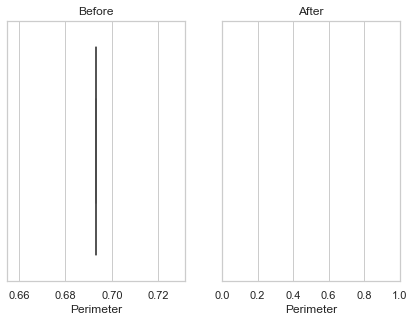

In [245]:
# # plt.figure(figsize=(10,10))
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[((df['Perimeter']<2) & (df['Perimeter']>1.8) )]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Perimeter'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Perimeter'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# # df=df2;
# # df=df.reset_index(drop=True)

Before Shape: (10834, 39)
After Shape: (10830, 39)


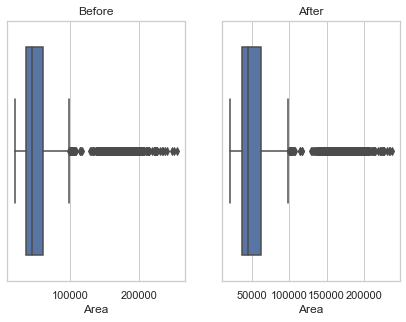

In [240]:
# # plt.figure(figsize=(10,10))
# fig, axes = plt.subplots(1,2)
# plt.tight_layout(0.2)

# print("Before Shape:",df.shape)
# ## Removing humidity bellow 0 outliers
# df2 = df[(df['Area']<240000)]
# print("After Shape:",df2.shape)

# sns.boxplot(df['Area'],orient='v',ax=axes[0])
# axes[0].title.set_text("Before")
# sns.boxplot(df2['Area'],orient='v',ax=axes[1])
# axes[1].title.set_text("After")
# plt.show()
# # Replace new dataset with previous and resetting indexes
# # df=df2;
# # df=df.reset_index(drop=True)

In [140]:
# class_count_0, class_count_1,class_count_2, class_count_3,class_count_4, class_count_5, class_count_6 = df['y'].value_counts()
# class_count_0, class_count_1 = df['y'].value_counts()

# # Separate class
# class_0 = df[df['y'] == 'DERMASON']
# class_1 = df[df['y'] == 'SIRA']
# class_2 = df[df['y'] == 'DERMASON']
# class_3 = df[df['y'] == 'SIRA']
# class_4 = df[df['y'] == 'DERMASON']
# class_5 = df[df['y'] == 'SIRA']
# class_6 = df[df['y'] == 'DERMASON']

# print('class 0:', class_0.shape)
# print('class 1:', class_1.shape

In [155]:
df['AP'] = np.sqrt(df.Area) + 1000* (df.ShapeFactor1)

In [156]:
# df.drop(columns='AP',inplace=True)

In [157]:
# df['AP'] = np.sqrt(df.Area) + 1000* (df.ShapeFactor2)

In [158]:
X = df.drop(columns=['ID','y'])

y = df['y']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=132)


In [229]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [230]:
# for i in range(1,100):
#     size = i *2
    
#     print(size)
#     scaled_X_train = scaler.fit_transform(X_train)
#     scaled_X_test = scaler.transform(X_test)
    
#     SVC_ = SVC(random_state=42,C= 50, gamma= 0.01, kernel= 'rbf',probability=True)
#     SVC_.fit(scaled_X_train, y_train)

#     y_predict_train = SVC_.predict(scaled_X_train)
# #     print(f1_score(y_predict_train, y_train,average='micro'))

#     y_predict = SVC_.predict(scaled_X_test)
#     print(f1_score(y_test, y_predict,average='micro'))
    
#     X_val = test.drop(columns=['ID'], axis=1)
#     #y_test = data_test['y']
#     X_val_scaled = scaler.fit_transform(X_val)
#     y_pred = SVC_.predict(X_val_scaled)
    
#     f0 = f1_score(y_actual, y_pred, average='micro')
#     print("f1_score: ",f0*100)

In [231]:
# weight = {'BOMBAY':0.261861,'BARBUNYA':0.194665,'CALI':0.149622,'HOROZ':0.137345,'SEKER':0.120362,'SIRA':0.097563,'DERMASON':0.038582}

In [232]:
SVC_ = SVC(random_state=42,C= 50, gamma= 0.01, kernel= 'rbf',probability=True)
SVC_.fit(scaled_X_train, y_train)

y_predict_train = SVC_.predict(scaled_X_train)
print(f1_score(y_predict_train, y_train,average='micro'))

y_predict = SVC_.predict(scaled_X_test)
print(f1_score(y_test, y_predict,average='micro'))

0.9326179762316834
0.9372404245500692


In [165]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[243   0  14   0   2   2   3]
 [  0 105   0   0   0   0   0]
 [  5   0 312   0   6   0   3]
 [  0   0   0 666   0   5  39]
 [  2   0   4   6 354   0   6]
 [  2   0   0   6   0 385  12]
 [  2   0   3  48   1   3 470]]
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.92      0.94       264
      BOMBAY       1.00      1.00      1.00       105
        CALI       0.94      0.96      0.95       326
    DERMASON       0.92      0.94      0.93       710
       HOROZ       0.98      0.95      0.96       372
       SEKER       0.97      0.95      0.96       405
        SIRA       0.88      0.89      0.89       527

    accuracy                           0.94      2709
   macro avg       0.95      0.94      0.95      2709
weighted avg       0.94      0.94      0.94      2709



In [553]:
labels=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [619]:
SVC_.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BARBUNYA'),
  Text(0, 1.5, 'BOMBAY'),
  Text(0, 2.5, 'CALI'),
  Text(0, 3.5, 'DERMASON'),
  Text(0, 4.5, 'HOROZ'),
  Text(0, 5.5, 'SEKER'),
  Text(0, 6.5, 'SIRA')])

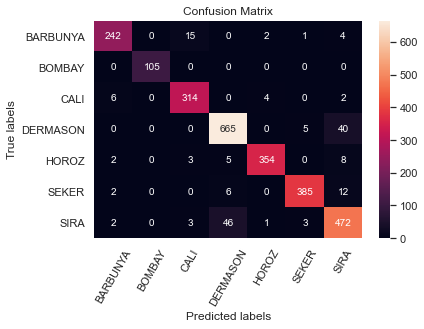

In [620]:
cm = confusion_matrix(y_test,y_predict)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels,);
plt.xticks(rotation=60)
plt.yticks(rotation=0)

In [106]:
data_test = pd.read_csv('test.csv')
test=data_test.copy()

In [168]:
test['AP'] = np.sqrt(test.Area) + 1000* (test.ShapeFactor1)

In [233]:
X_val = test.drop(columns=['ID'], axis=1)
#y_test = data_test['y']
X_val_scaled = scaler.fit_transform(X_val)
y_pred = SVC_.predict(X_val_scaled)


In [234]:
test_df =  pd.read_csv('real_test_data.csv')

y_actual=test_df['Class']

In [235]:
from sklearn.metrics import f1_score
#y_pred0 = model.svm.predict(X_test)
f0 = f1_score(y_actual, y_pred, average='micro')
print("f1_score: ",f0*100)

f1_score:  93.42930970837948


In [622]:
data_test['y'] = y_pred
data_test[['ID', 'y']].to_csv('sub_x.csv', index=False)
f = pd.read_csv('sub_x.csv')


,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [196]:
test.set_index('ID',inplace=True)

In [197]:
test_scaler = scaler.transform(test)

In [198]:
test_pred = SVC_.predict(test_scaler)

In [201]:
test.reset_index(inplace=True)

In [ ]:
test = 

In [ ]:
test_df[['ID', 'y']].to_csv('submission.csv', index=False)